In [1]:
import sys,os
sys.path.append("../")
sys.path.append("../../../generate_apodized_mask/")
import py_qu2eb
import pymain
import healpy as h
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
apomask=h.read_map("../datain/mask_gal70_nside512.fits",verbose=False)
nside=h.get_nside(apomask) ; npixtot=h.nside2npix(nside)

In [3]:
# apomask=pymain.gen_apodized_mask(mask,nside,1,0.,0.,780.,npixtot)
# nside=h.get_nside(apomask) ; npixtot=h.nside2npix(nside)

<IPython.core.display.Javascript object>


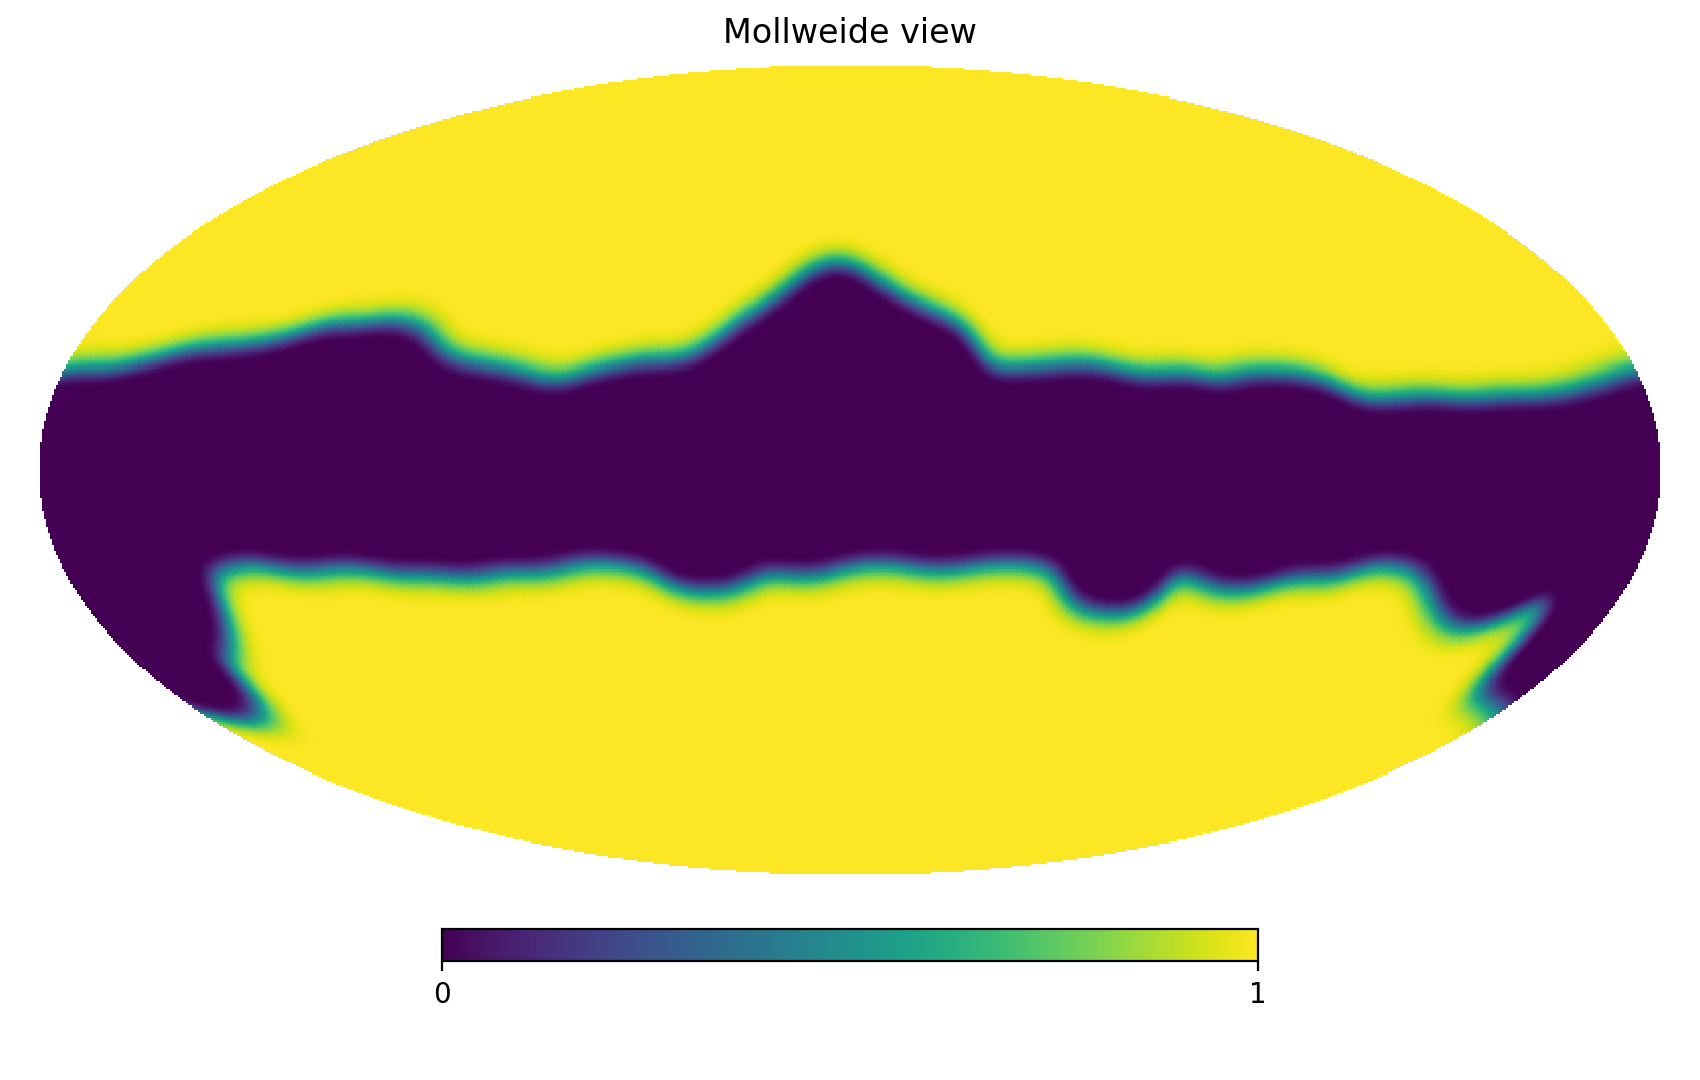

In [4]:
h.mollview(apomask)

In [7]:
TQU=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TQU=transpose(TQU)
TEBfs=py_qu2eb.get_teb(TQU,apomask,nside,3*nside,1,4,npixtot)
TEBfs=transpose(TEBfs)
TEBd=py_qu2eb.get_teb(TQU*apomask**2.,apomask,nside,3*nside,1,4,npixtot)
TEBd=transpose(TEBd)
TEBcs=py_qu2eb.get_teb(TQU,apomask,nside,3*nside,0,4,npixtot)
TEBcs=transpose(TEBcs)

In [12]:
TQU=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TQU=transpose(TQU*apomask**2)
TEBd=py_qu2eb.get_teb(TQU,apomask,nside,3*nside,1,4,npixtot)
TEBd=transpose(TEBd)

<IPython.core.display.Javascript object>


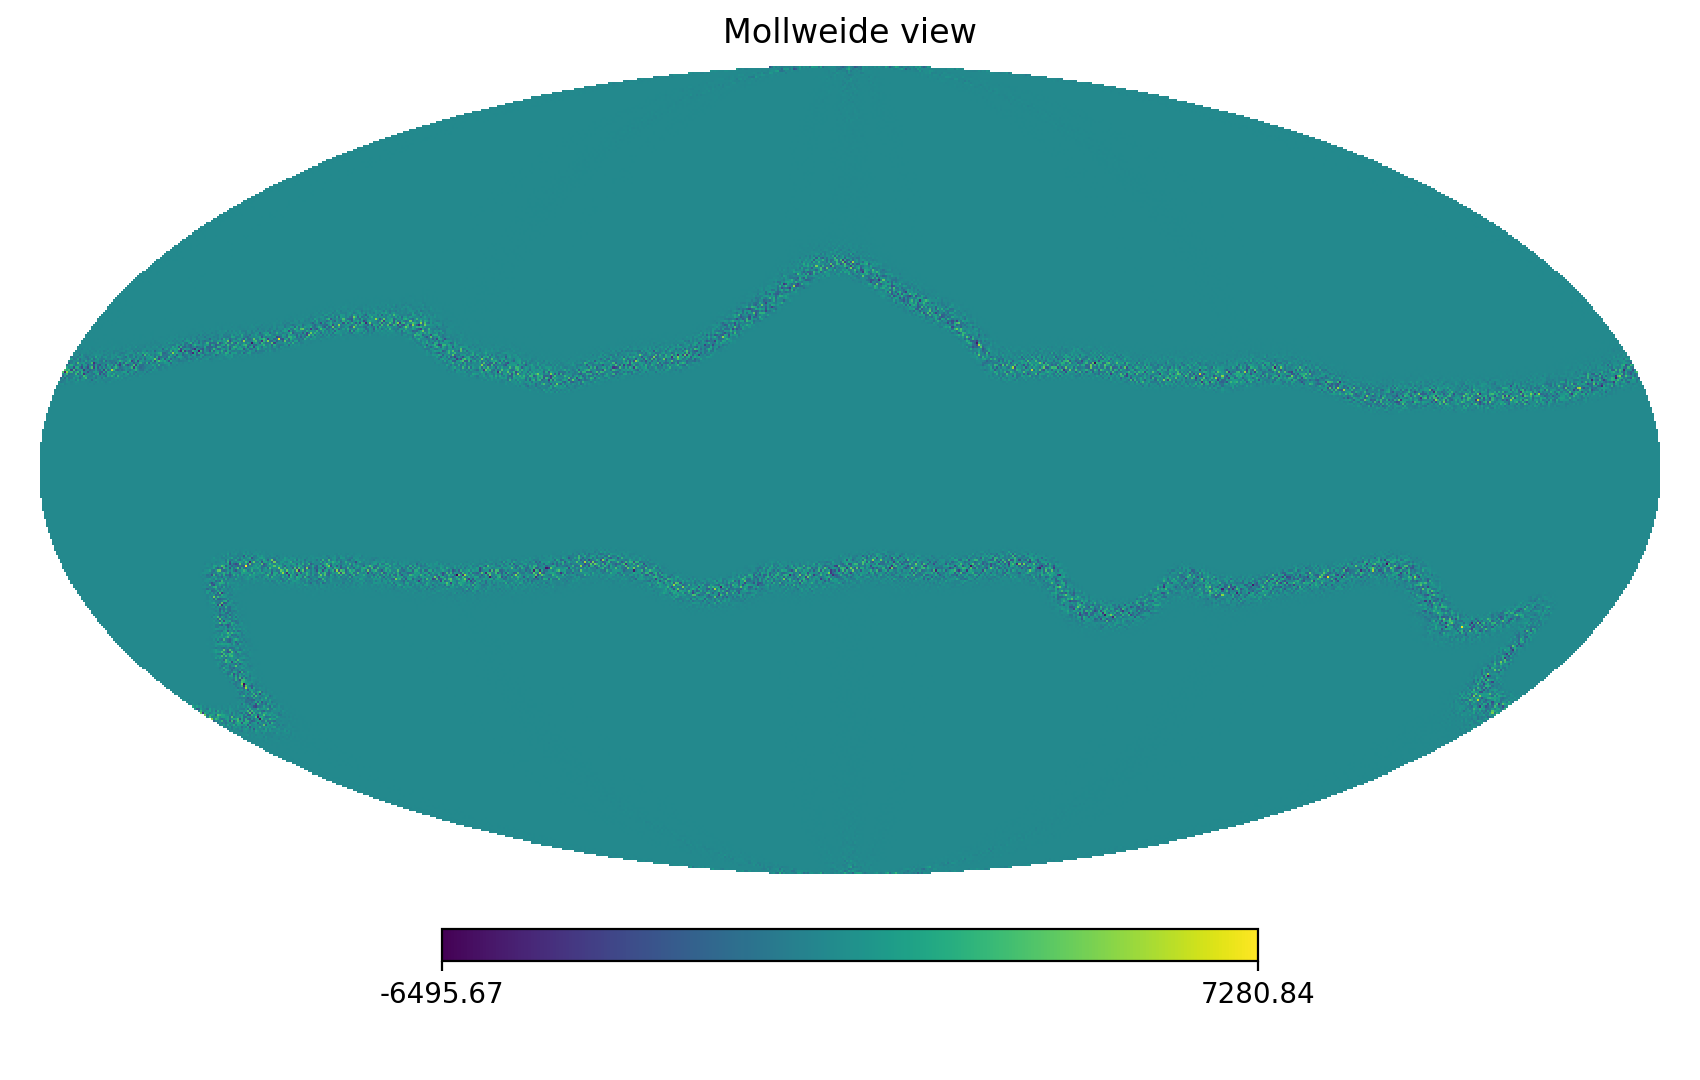

<IPython.core.display.Javascript object>


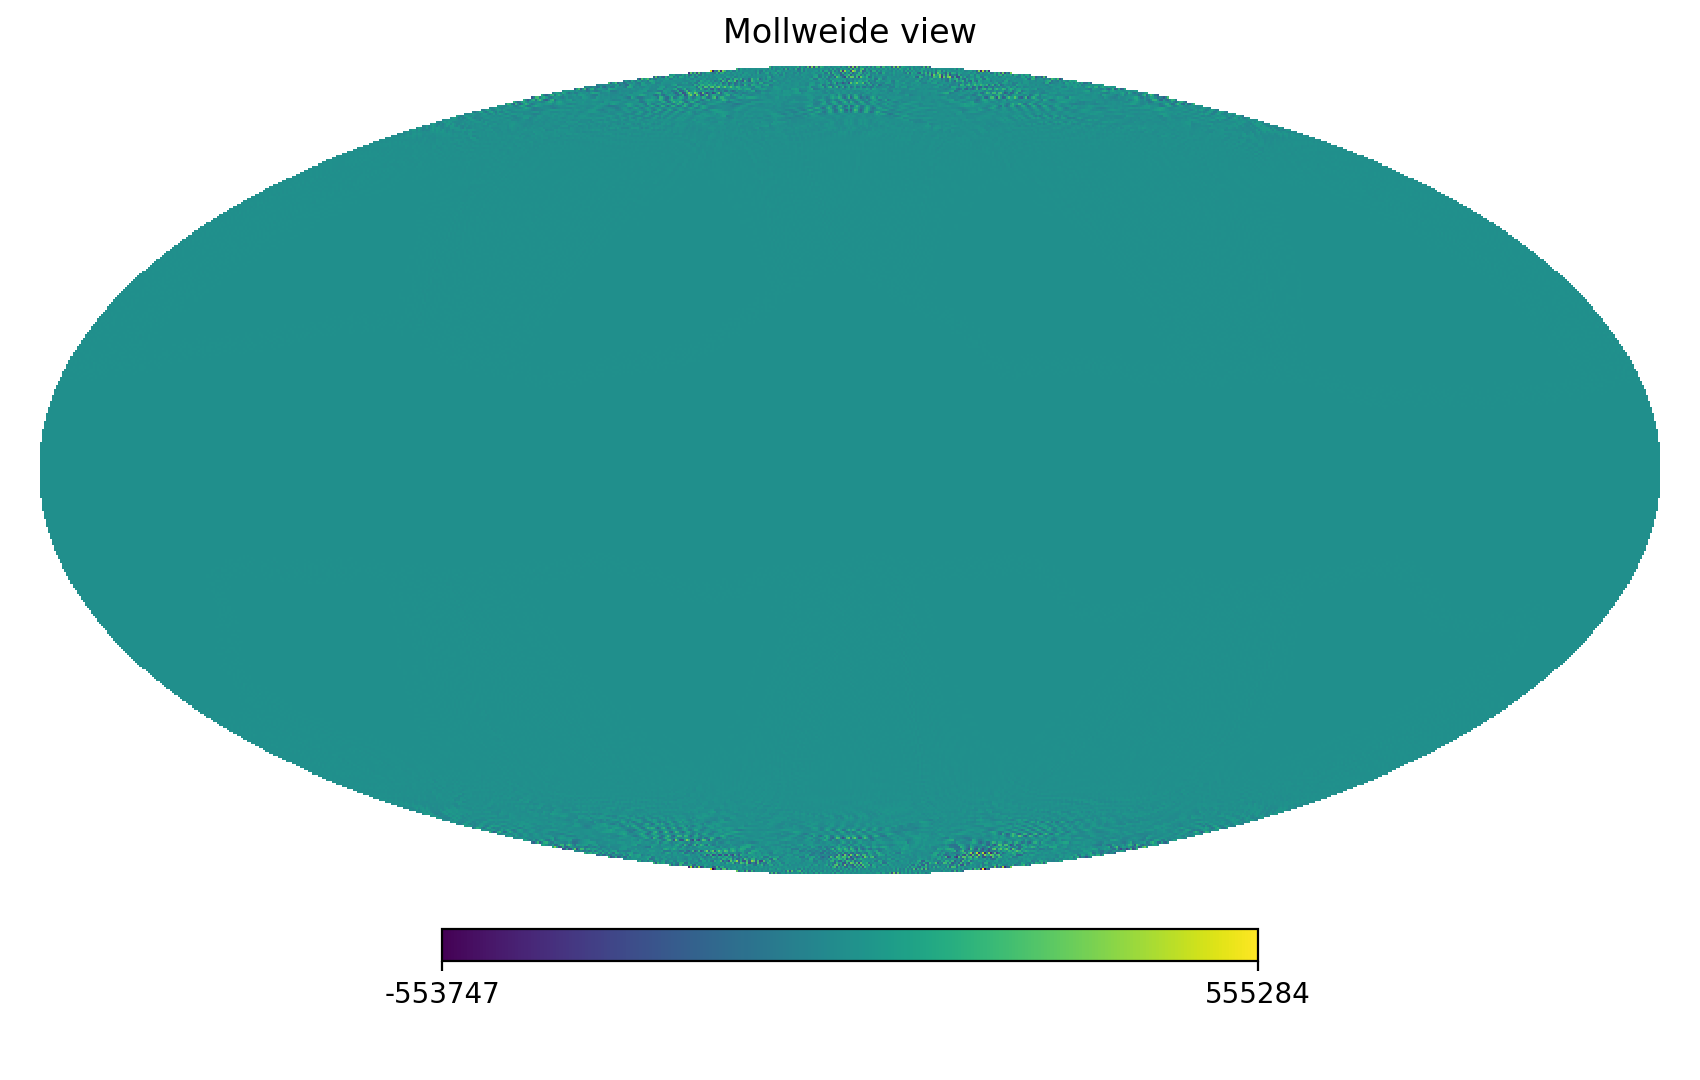

<IPython.core.display.Javascript object>


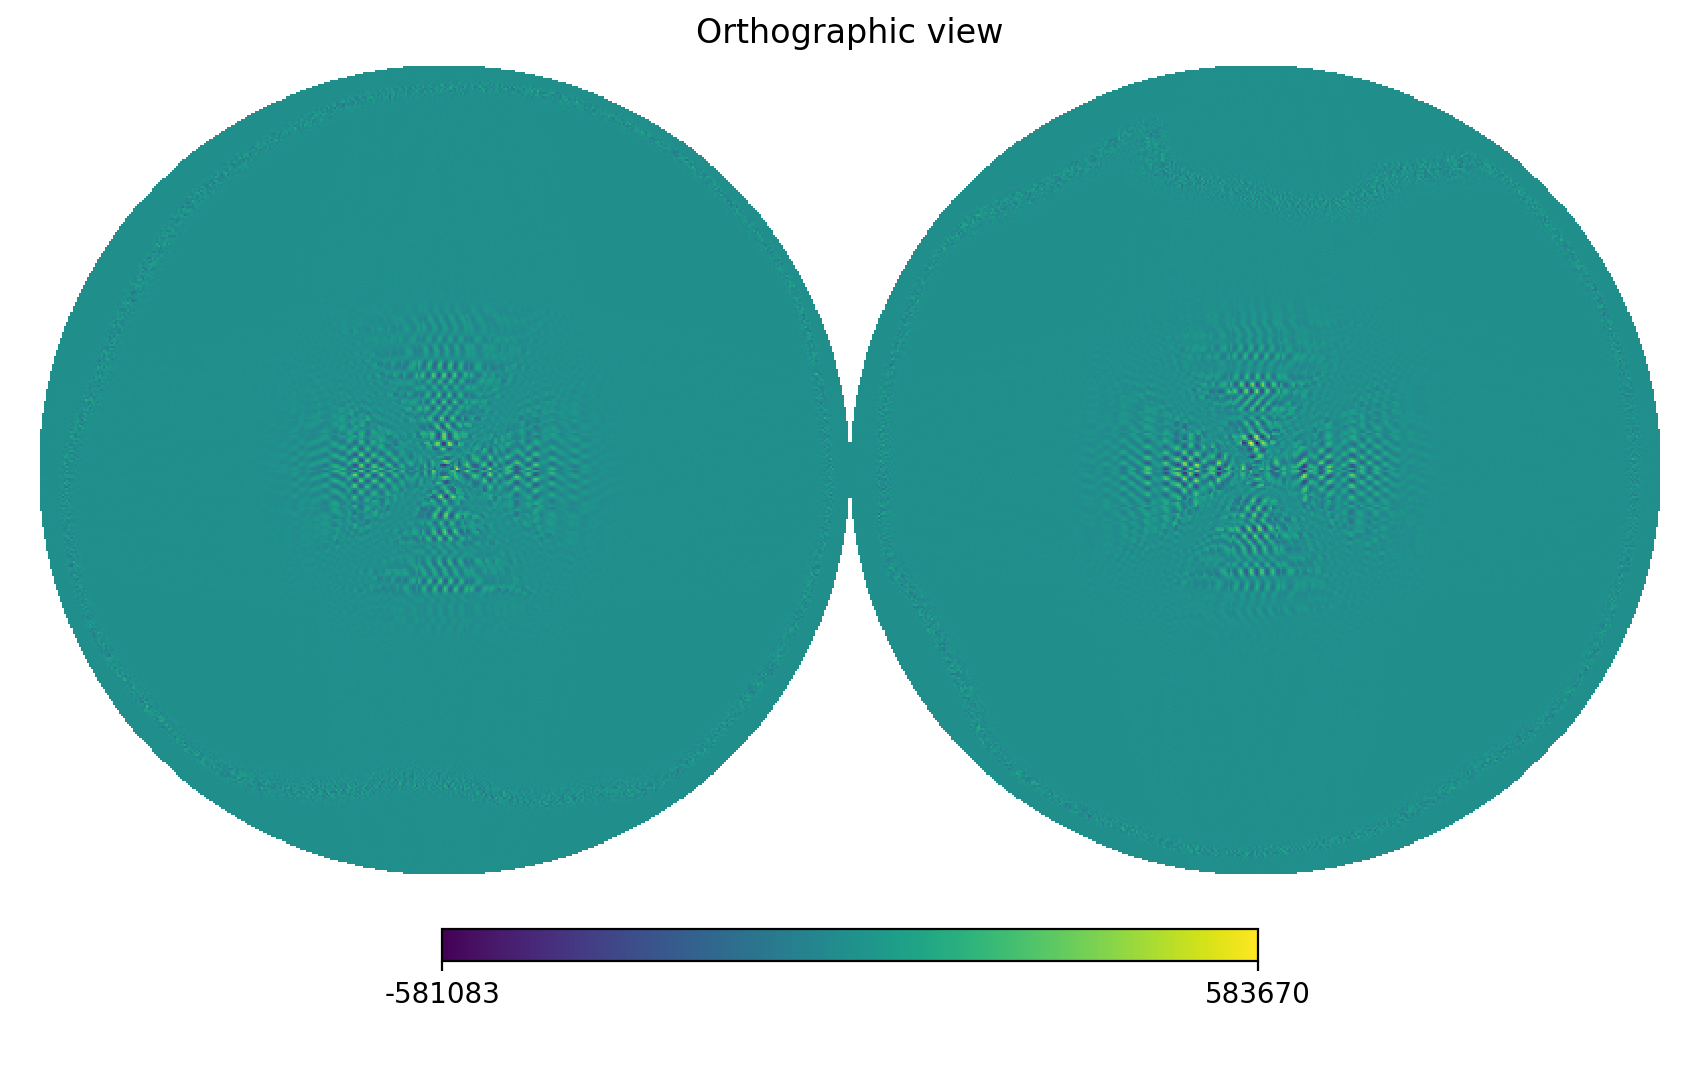

In [15]:
h.mollview(TEBfs[2,]*apomask**2.-TEBcs[2,],rot=(0,0))
h.mollview(TEBcs[2,],rot=(0,0))
h.orthview(TEBd[2,],rot=(0,90))

<IPython.core.display.Javascript object>


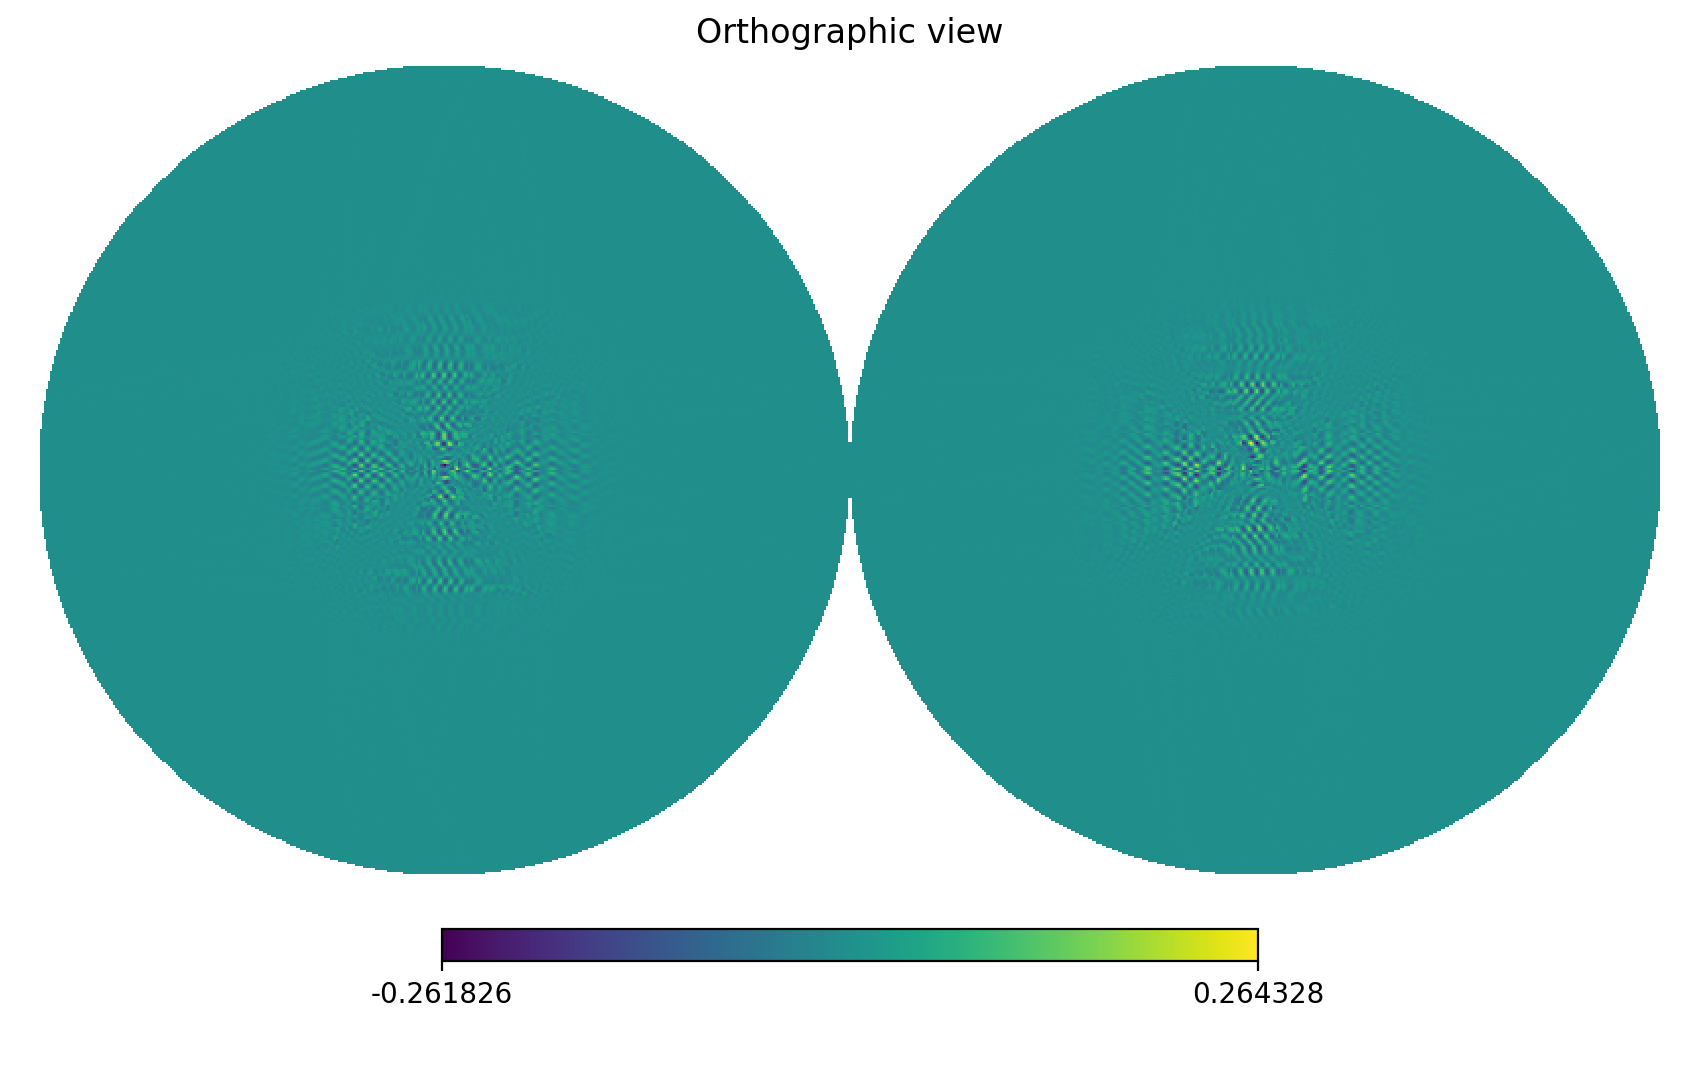

<IPython.core.display.Javascript object>


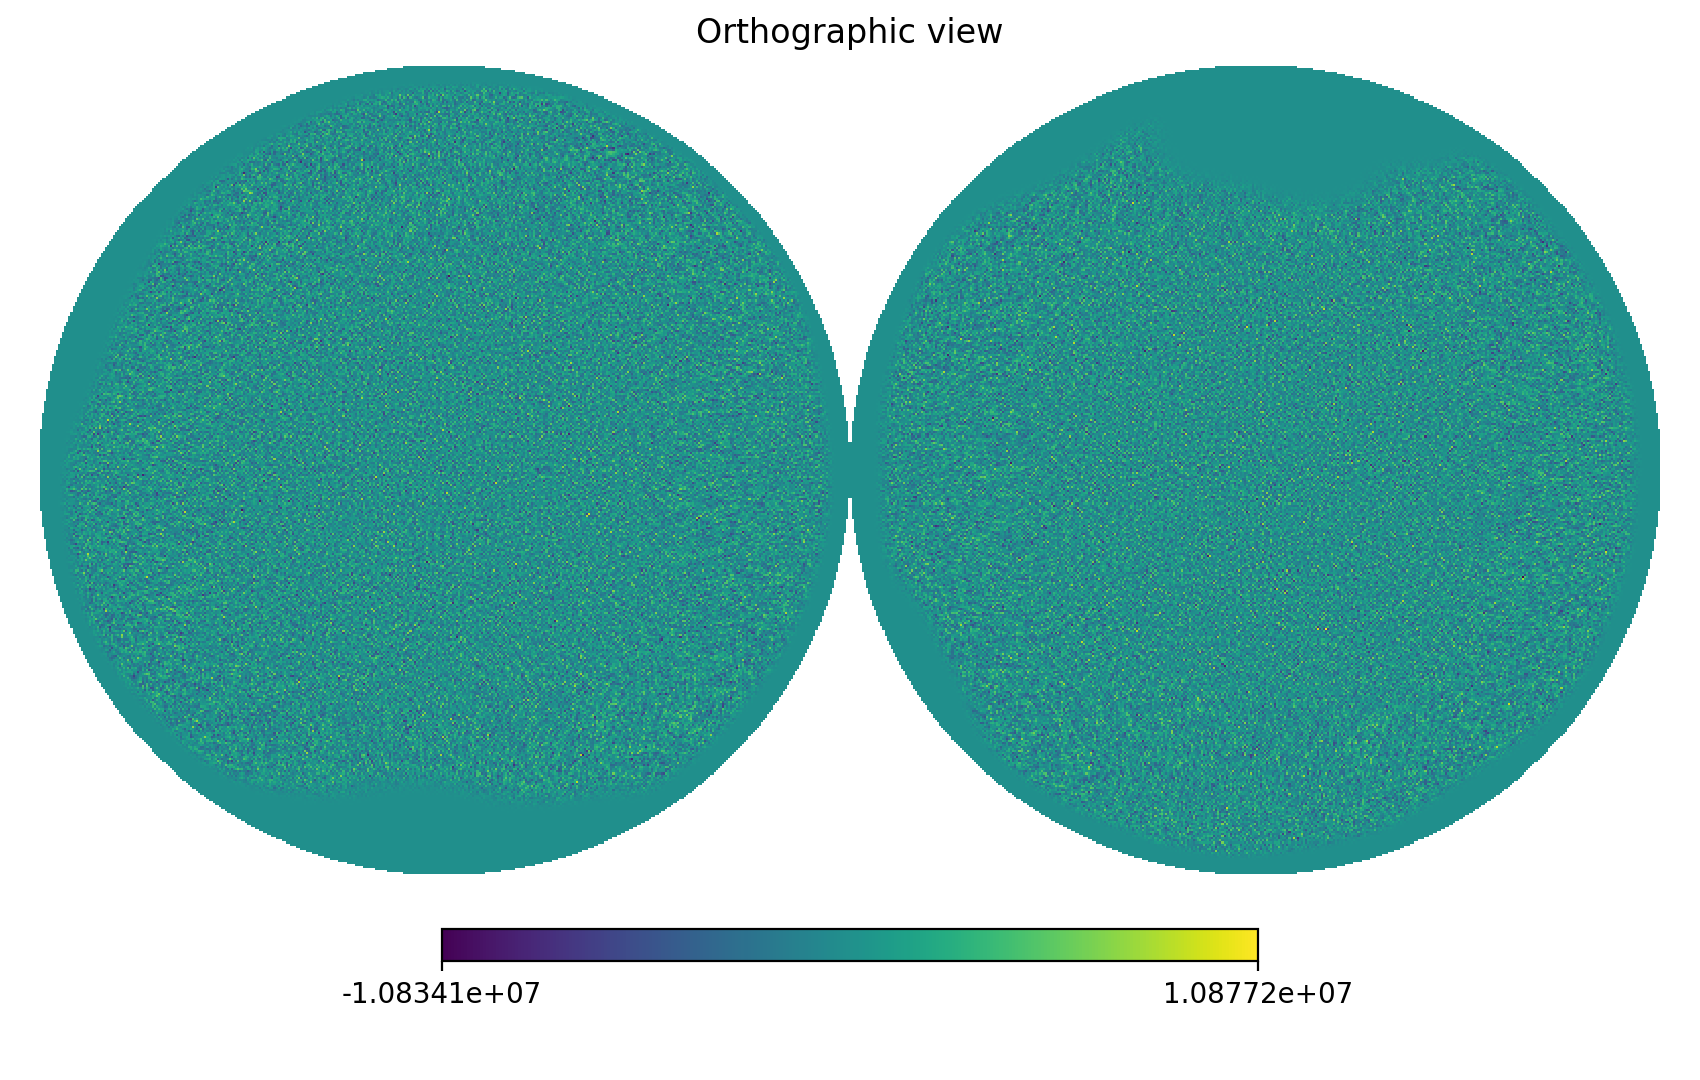

In [6]:
h.orthview(TEB[2,],rot=(0,90))
TEBf=h.read_map("../dataout/map_TEB.fits",(0,1,2),verbose=False)
h.orthview(TEBf[1,]-TEB[1,],rot=(0,90))

In [66]:
ell=arange(1025)
fl=sqrt(((ell+2.)*(ell-1.))*ell*(ell+1.))
m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB0_alm=h.map2alm(m,lmax=1024,pol=True)
for i in range(3):
    h.almxfl(TEB0_alm[i,],fl,inplace=True)
TEB0=h.alm2map(TEB0_alm,512,pol=False,verbose=False)
TEB0_alm=h.map2alm(TEB0*apomask**2.,lmax=1024,pol=False)
clb0=h.alm2cl(TEB0_alm[2])

m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB1_alm=h.map2alm(m*apomask**2.,lmax=1024,pol=True)
for i in range(3):
    h.almxfl(TEB1_alm[i,],fl,inplace=True)
# TEB1=h.alm2map(TEB1_alm,512,pol=False,verbose=False)
clb1=h.alm2cl(TEB1_alm[2])

TEB_alm=h.map2alm(TEBcs,lmax=1024,pol=True)
clb=h.alm2cl(TEB_alm[2])


In [28]:
cle0=h.alm2cl(TEB0_alm[1])

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


<IPython.core.display.Javascript object>


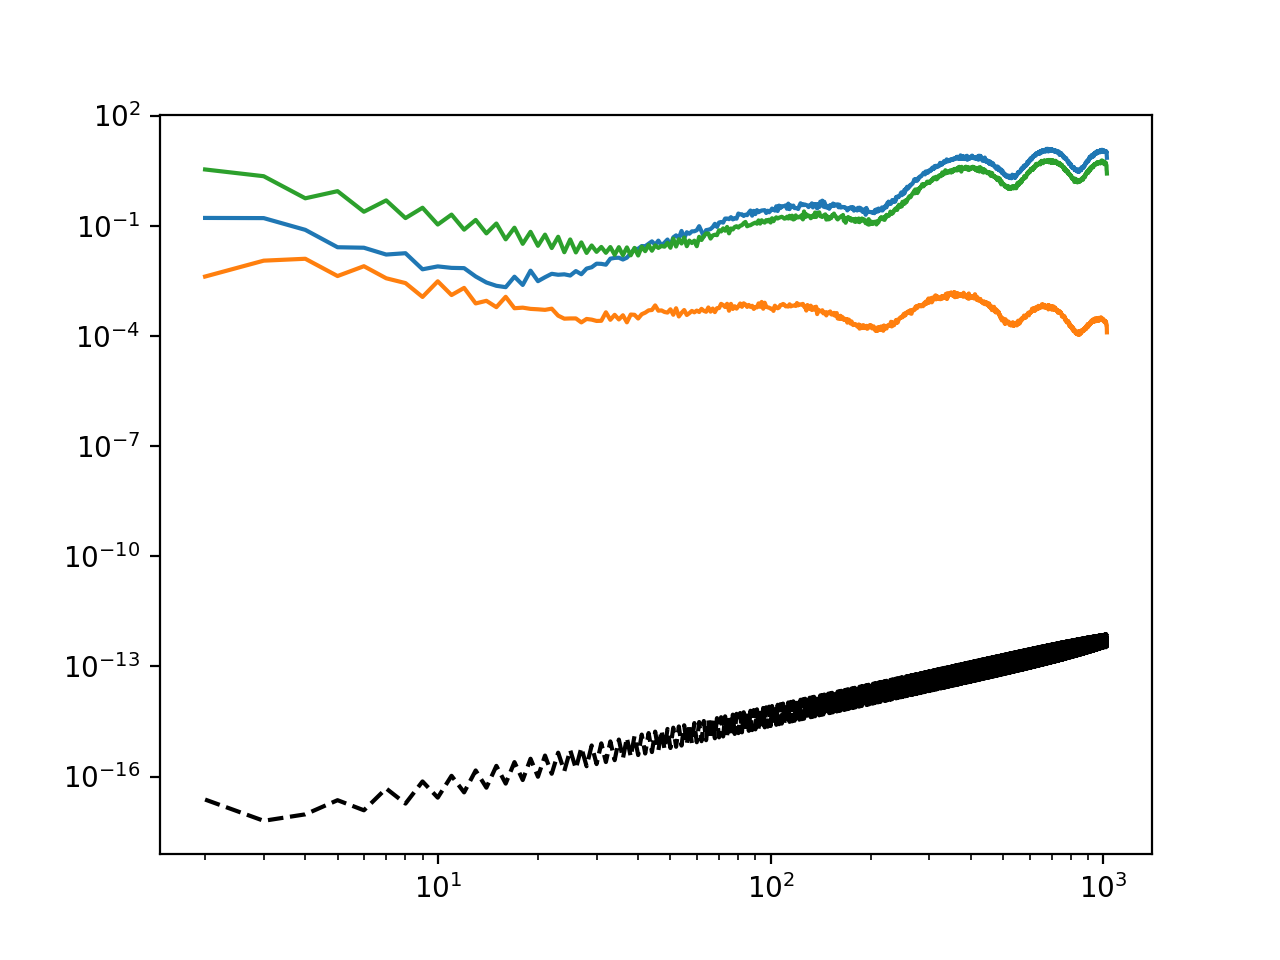

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[]

In [29]:
ell=arange(1025)
f=1./((2.*pi)*((ell+2.)*(ell-1.)))
figure()
plot(ell,f*cle0)
plot(ell,f*clb0,"k--")
plot(ell,f*clb1)
plot(ell,f*clb)
loglog()